In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data_path = 'healthcare-dataset-stroke-data (2).csv'
df = pd.read_csv(data_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df_edit = df.drop(columns=['id'])
print(len(df_edit))
print(df_edit.shape)
df_edit['bmi'].fillna(df_edit['bmi'].mean(), inplace=True)



5110
(5110, 11)


C:\Users\Hossam Salah\AppData\Local\Temp\ipykernel_19600\346148576.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_edit['bmi'].fillna(df_edit['bmi'].mean(), inplace=True)


# **Data Visualization, Preprocessing, and Cleaning**

In [4]:
df_encoded = pd.get_dummies(df_edit,columns=['gender','ever_married','work_type', 'Residence_type', 'smoking_status'], drop_first=False).astype(np.float64)
df_encoded.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.600000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,28.893237,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.500000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.400000,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
# count nulls
df_encoded.isnull().sum()
df_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.600000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,28.893237,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.500000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.400000,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df_encoded.describe(percentiles=[.25, .5, .75,.9, .88, .99])


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.585910,0.413894,0.000196,0.343836,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320,0.492612,0.492578,0.013989,0.475034,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
88%,72.000000,0.000000,0.000000,172.325200,37.500000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,75.000000,0.000000,0.000000,192.181000,38.700000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,82.000000,1.000000,1.000000,240.708200,52.891000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#remove the outliers above 99th percentile
df_encoded = df_encoded[df_encoded['avg_glucose_level'] <= df_encoded['avg_glucose_level'].quantile(0.99)]
df_encoded = df_encoded[df_encoded['bmi'] <= df_encoded['bmi'].quantile(0.99)]
df_encoded.describe(percentiles=[.25, .5, .75,.9, .88, .99])



,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,...,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000
mean,42.992211,0.094068,0.053126,104.499571,28.557112,0.047733,0.584582,0.415219,0.000200,0.348312,...,0.004394,0.570202,0.159577,0.137208,0.492311,0.507689,0.304973,0.172558,0.369083,0.153385
std,22.658776,0.291953,0.224306,42.840241,7.056901,0.213222,0.492843,0.492809,0.014132,0.476483,...,0.066147,0.495097,0.366249,0.344101,0.499991,0.499991,0.460442,0.377903,0.482605,0.360394
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.075000,23.650000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,91.560000,28.300000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,112.955000,32.600000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
88%,72.000000,0.000000,0.000000,160.673600,37.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,75.000000,0.000000,0.000000,183.376000,38.100000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,82.000000,1.000000,1.000000,231.938600,48.194000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Apply SMOTE to increase the proportion of stroke cases
from imblearn.over_sampling import SMOTE
from collections import Counter
# First split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Print original distribution
print("Original distribution:")
print(Counter(y))

# First split: separate out the test set (25%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Second split: split the remaining data into train (80%) and validation (20%)
# This gives us 60% train, 15% validation, 25% test of the original data
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.20,  # 0.20 of the remaining 75% = 15% of total
    random_state=42,
    stratify=y_temp
)

# Print distribution before SMOTE
print("\nDistribution before SMOTE:")
print("Training set:", Counter(y_train))
print("Validation set:", Counter(y_val))
print("Test set:", Counter(y_test))

# Apply SMOTE only to the training data
smote = SMOTE(sampling_strategy=0.82, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print distribution after SMOTE
print("\nDistribution after SMOTE (only applied to training data):")
print("Training set:", Counter(y_train_balanced))
print("Validation set:", Counter(y_val))
print("Test set:", Counter(y_test))

# Print shapes of all datasets
print("\nShapes of the datasets:")
print(f"X_train shape: {X_train_balanced.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train_balanced.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

# Print distribution percentages
print("\nTraining set stroke distribution:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))
print("\nValidation set stroke distribution:")
print(pd.Series(y_val).value_counts(normalize=True))
print("\nTest set stroke distribution:")
print(pd.Series(y_test).value_counts(normalize=True))

Original distribution:
Counter({0.0: 4768, 1.0: 239})

Distribution before SMOTE:
Training set: Counter({0.0: 2861, 1.0: 143})
Validation set: Counter({0.0: 715, 1.0: 36})
Test set: Counter({0.0: 1192, 1.0: 60})

Distribution after SMOTE (only applied to training data):
Training set: Counter({0.0: 2861, 1.0: 2346})
Validation set: Counter({0.0: 715, 1.0: 36})
Test set: Counter({0.0: 1192, 1.0: 60})

Shapes of the datasets:
X_train shape: (5207, 21)
X_val shape: (751, 21)
X_test shape: (1252, 21)
y_train shape: (5207,)
y_val shape: (751,)
y_test shape: (1252,)

Training set stroke distribution:
stroke
0.0    0.549453
1.0    0.450547
Name: proportion, dtype: float64

Validation set stroke distribution:
stroke
0.0    0.952064
1.0    0.047936
Name: proportion, dtype: float64

Test set stroke distribution:
stroke
0.0    0.952077
1.0    0.047923
Name: proportion, dtype: float64


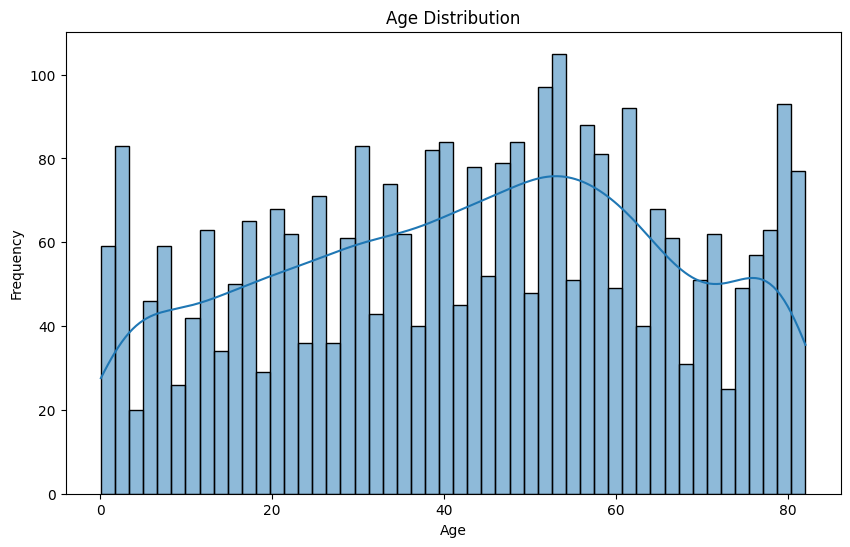

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

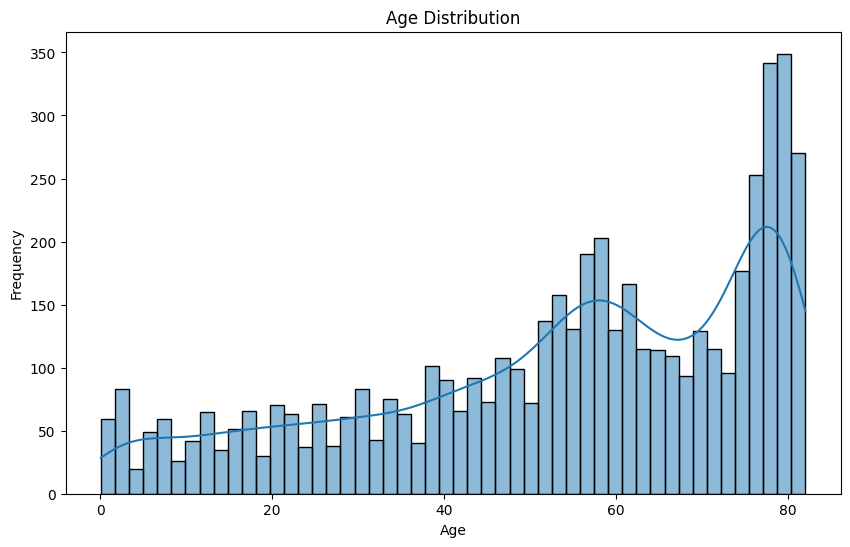

In [10]:

plt.figure(figsize=(10, 6))
sns.histplot(X_train_balanced['age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
# count nulls
X_train_balanced.isnull().sum()
X_train_balanced.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,54.0,0.0,0.0,206.72,26.7,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,45.0,1.0,0.0,85.52,36.4,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,70.0,0.0,0.0,149.80,47.6,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,9.0,0.0,0.0,114.99,18.8,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,79.0,0.0,0.0,83.70,28.7,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
X_train_balanced.describe(percentiles=[.25, .5, .75,.9, .88, .99])

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,...,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000,5207.000000
mean,53.687005,0.159692,0.110383,113.085167,28.950397,0.586396,0.413411,0.000192,0.253983,0.746017,...,0.003073,0.551087,0.211191,0.082278,0.459520,0.540480,0.248562,0.240742,0.367671,0.143025
std,22.731022,0.330421,0.281290,49.137942,6.197109,0.457750,0.457714,0.013858,0.418064,0.418064,...,0.055353,0.462613,0.373416,0.273688,0.461305,0.461305,0.407344,0.390061,0.448556,0.328065
min,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,78.736300,25.200000,0.000000,0.000000,0.000000,0.000000,0.444705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,0.000000,0.000000,94.976660,28.676026,0.930595,0.069046,0.000000,0.000000,1.000000,...,0.000000,0.760991,0.000000,0.000000,0.297291,0.702709,0.000000,0.000000,0.000000,0.000000
75%,74.571699,0.000000,0.000000,127.229593,32.181864,1.000000,1.000000,0.000000,0.555295,1.000000,...,0.000000,1.000000,0.252367,0.000000,1.000000,1.000000,0.481468,0.457021,1.000000,0.000000
88%,78.695353,0.775598,0.417137,198.237284,36.305278,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.758856
90%,79.000000,0.888697,0.602311,203.036493,37.269896,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980988
99%,81.997268,1.000000,1.000000,233.727152,45.775104,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Define thresholds for outliers
bmi_mean, bmi_std = 28.9, 5.9
glucose_mean, glucose_std = 111, 38

bmi_lower, bmi_upper = bmi_mean - 3 * bmi_std, bmi_mean + 3 * bmi_std
glucose_lower, glucose_upper = glucose_mean - 3 * glucose_std, glucose_mean + 3 * glucose_std

print(f"BMI Outlier Range: Below {bmi_lower:.2f} or Above {bmi_upper:.2f}")
print(f"Glucose Outlier Range: Below {glucose_lower:.2f} or Above {glucose_upper:.2f}")

# Identify outliers for BMI and glucose levels
bmi_outliers = X_train_balanced[(X_train_balanced['bmi'] <= bmi_lower) | (X_train_balanced['bmi'] >= bmi_upper)]
glucose_outliers = X_train_balanced[(X_train_balanced['avg_glucose_level'] < glucose_lower) | (X_train_balanced['avg_glucose_level'] > glucose_upper)]

# Count total outliers and stroke cases among them
bmi_stroke_cases = sum(y_train_balanced[bmi_outliers.index])
glucose_stroke_cases = sum(y_train_balanced[glucose_outliers.index])

print(f"Total BMI Outliers: {len(bmi_outliers)}, Stroke Cases: {bmi_stroke_cases}")
print(f"Total Glucose Outliers: {len(glucose_outliers)}, Stroke Cases: {glucose_stroke_cases}")

# Remove outliers from both features and target
outlier_indices = X_train_balanced[(X_train_balanced['bmi'] < bmi_lower) | 
                                  (X_train_balanced['bmi'] > bmi_upper) |
                                  (X_train_balanced['avg_glucose_level'] < glucose_lower) | 
                                  (X_train_balanced['avg_glucose_level'] > glucose_upper)].index

X_train_cleaned = X_train_balanced.drop(outlier_indices)
y_train_cleaned = y_train_balanced.drop(outlier_indices)

print()
print(len(X_train_balanced), "length of resampled dataset")
print("removing ", len(X_train_balanced) - len(X_train_cleaned), " outliers..")
print(len(X_train_cleaned), " remaining after removing outliers")
print(sum(y_train_balanced), "stroke cases in resampled dataset")
print(sum(y_train_cleaned), "stroke cases remaining..")

BMI Outlier Range: Below 11.20 or Above 46.60
Glucose Outlier Range: Below -3.00 or Above 225.00
Total BMI Outliers: 37, Stroke Cases: 0.0
Total Glucose Outliers: 177, Stroke Cases: 112.0

5207 length of resampled dataset
removing  211  outliers..
4996  remaining after removing outliers
2346.0 stroke cases in resampled dataset
2234.0 stroke cases remaining..


In [14]:
X_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 5206
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4996 non-null   float64
 1   hypertension                    4996 non-null   float64
 2   heart_disease                   4996 non-null   float64
 3   avg_glucose_level               4996 non-null   float64
 4   bmi                             4996 non-null   float64
 5   gender_Female                   4996 non-null   float64
 6   gender_Male                     4996 non-null   float64
 7   gender_Other                    4996 non-null   float64
 8   ever_married_No                 4996 non-null   float64
 9   ever_married_Yes                4996 non-null   float64
 10  work_type_Govt_job              4996 non-null   float64
 11  work_type_Never_worked          4996 non-null   float64
 12  work_type_Private               4996 no

Correlation between BMI and Stroke: 0.10


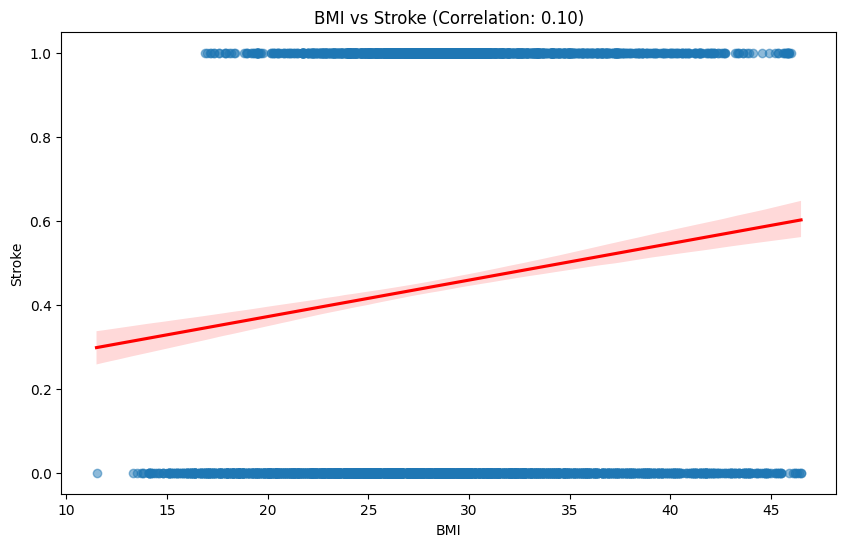

In [15]:
# Calculate the correlation coefficient
correlation = pd.DataFrame({
    'bmi': X_train_cleaned['bmi'],
    'stroke': y_train_cleaned
}).corr().iloc[0, 1]
print(f"Correlation between BMI and Stroke: {correlation:.2f}")

# Visualize the correlation using a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=X_train_cleaned['bmi'], y=y_train_cleaned, 
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'BMI vs Stroke (Correlation: {correlation:.2f})')
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.show()

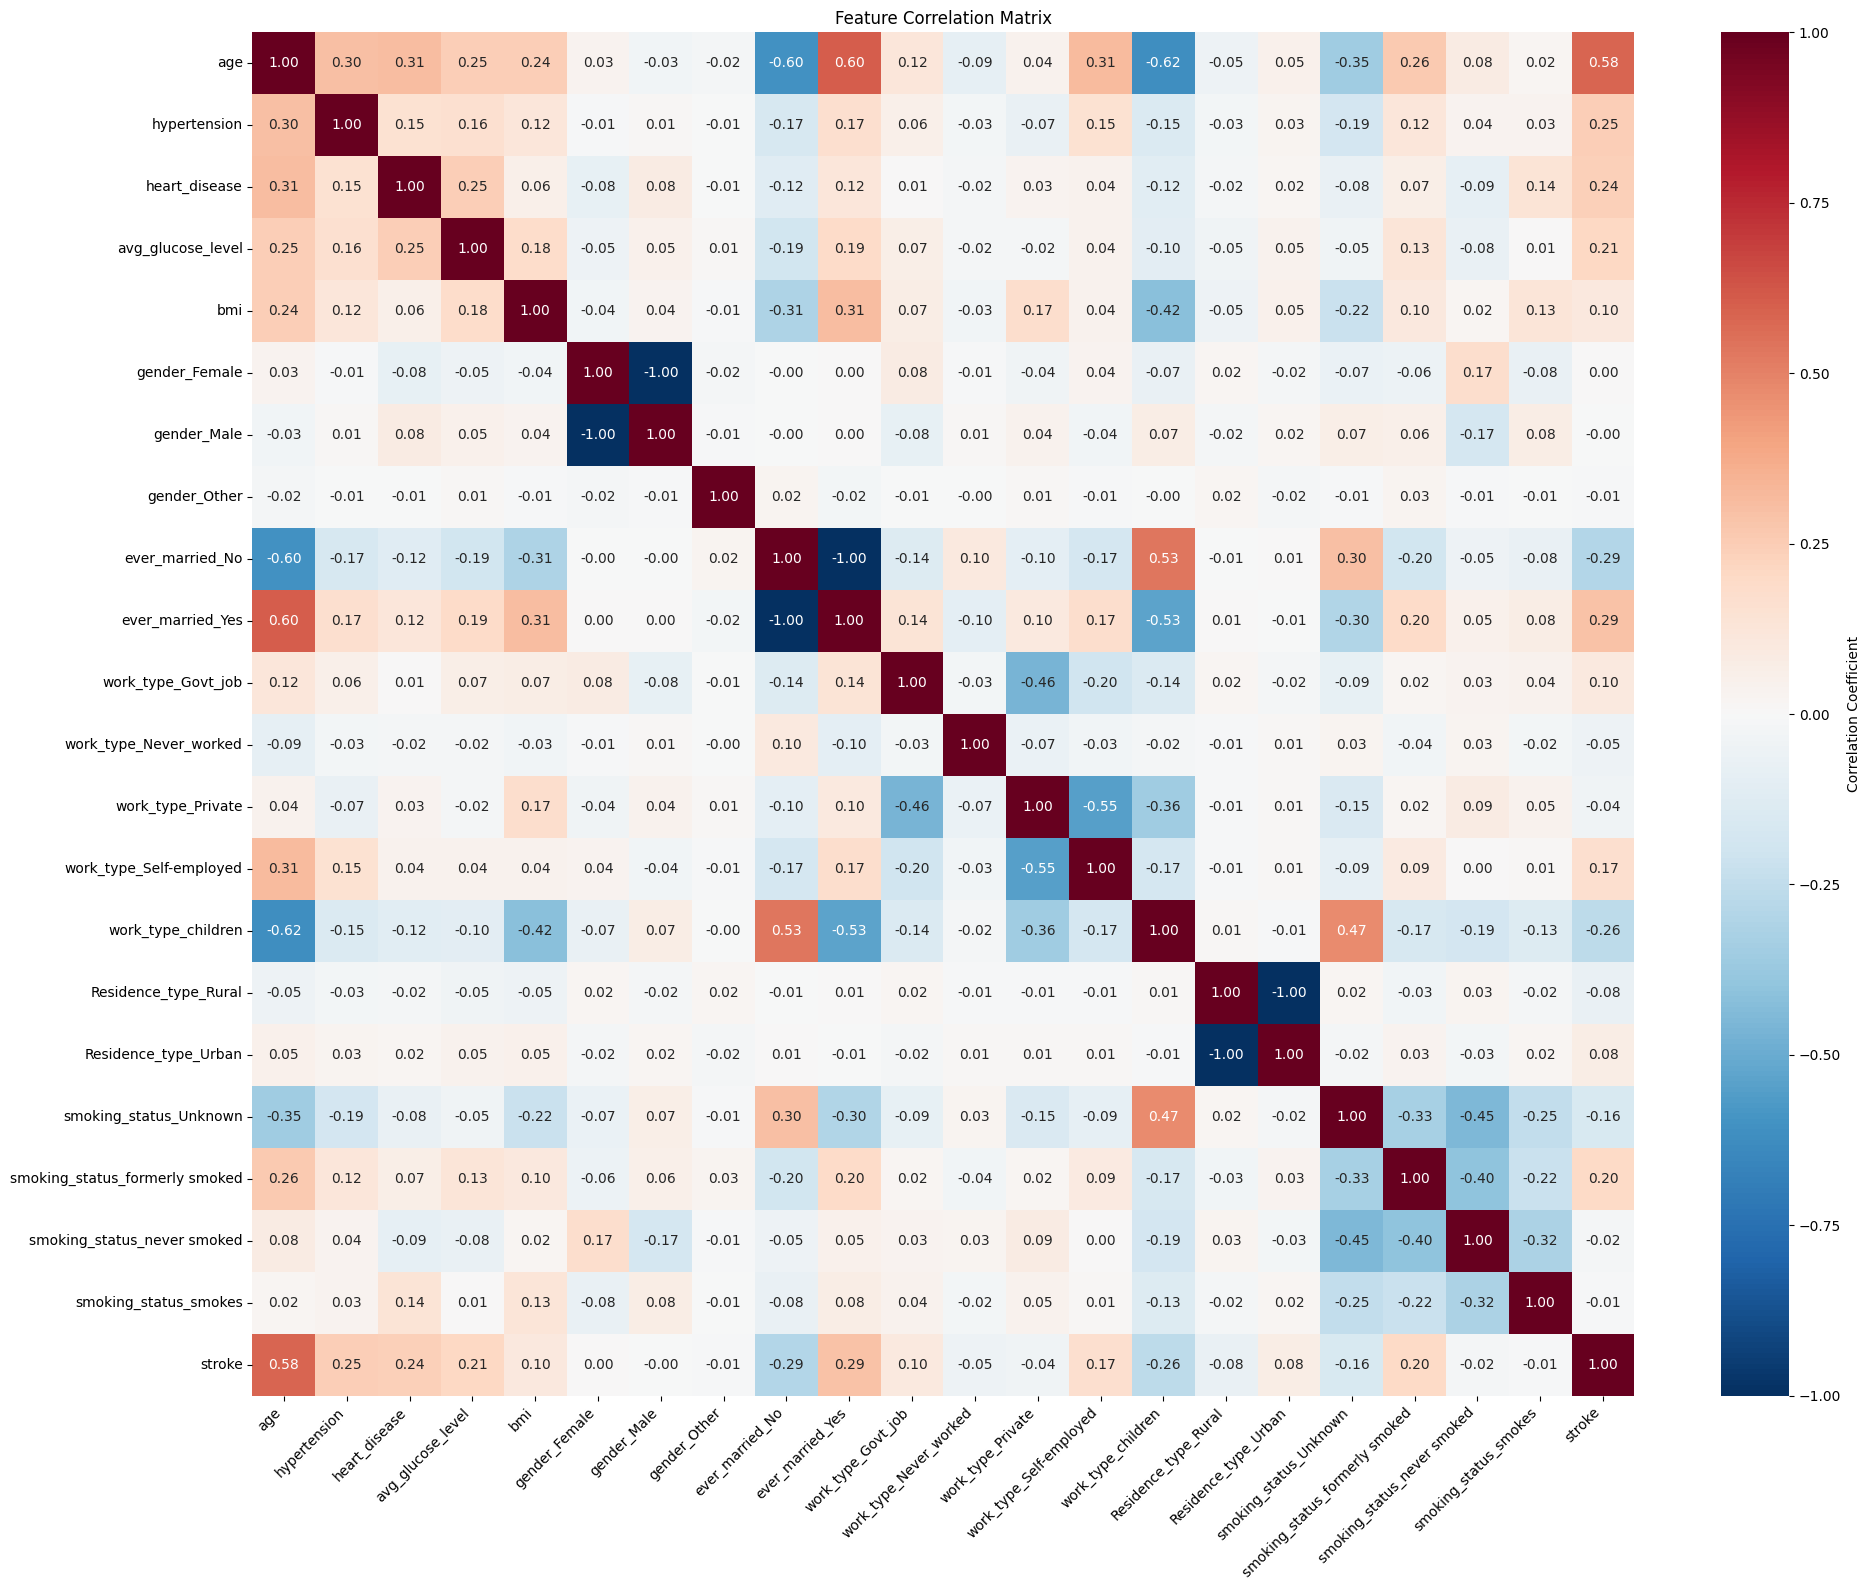


Correlation with stroke:
stroke                            1.000000
age                               0.580056
ever_married_Yes                  0.292510
hypertension                      0.247260
heart_disease                     0.239051
avg_glucose_level                 0.210644
smoking_status_formerly smoked    0.199900
work_type_Self-employed           0.168890
bmi                               0.103759
work_type_Govt_job                0.095800
Residence_type_Urban              0.075312
gender_Female                     0.001574
gender_Male                      -0.001181
smoking_status_smokes            -0.010605
gender_Other                     -0.012725
smoking_status_never smoked      -0.020656
work_type_Private                -0.041314
work_type_Never_worked           -0.050977
Residence_type_Rural             -0.075312
smoking_status_Unknown           -0.158932
work_type_children               -0.261164
ever_married_No                  -0.292510
Name: stroke, dtype: float64

In [16]:
# Create correlation matrix
correlation_matrix = pd.concat([X_train_cleaned, y_train_cleaned], axis=1).corr()

# Create a single comprehensive correlation matrix heatmap
plt.figure(figsize=(20, 16))

# Plot the full correlation matrix
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print the correlation with stroke
print("\nCorrelation with stroke:")
print(correlation_matrix['stroke'].sort_values(ascending=False))

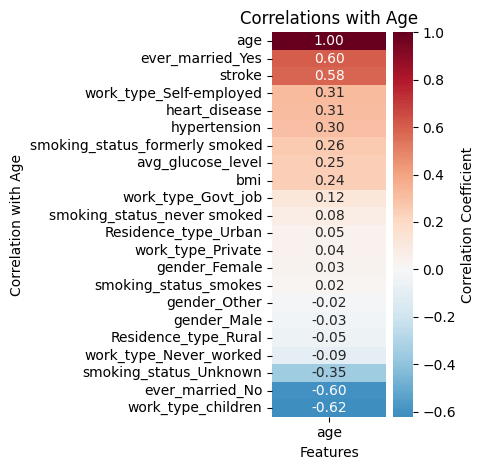

In [17]:
# Plot correlation matrix for age
plt.subplot(1, 2, 2)
age_correlations = correlation_matrix['age'].sort_values(ascending=False)
sns.heatmap(age_correlations.to_frame(), 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlations with Age')
plt.xlabel('Features')
plt.ylabel('Correlation with Age')

plt.tight_layout()
plt.show()

Typically, features with stroke correlation below 0.15 are unwanted and may be removed, and those otherwise are kept, but we need to do further inspection before we remove them.

C:\Users\Hossam Salah\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


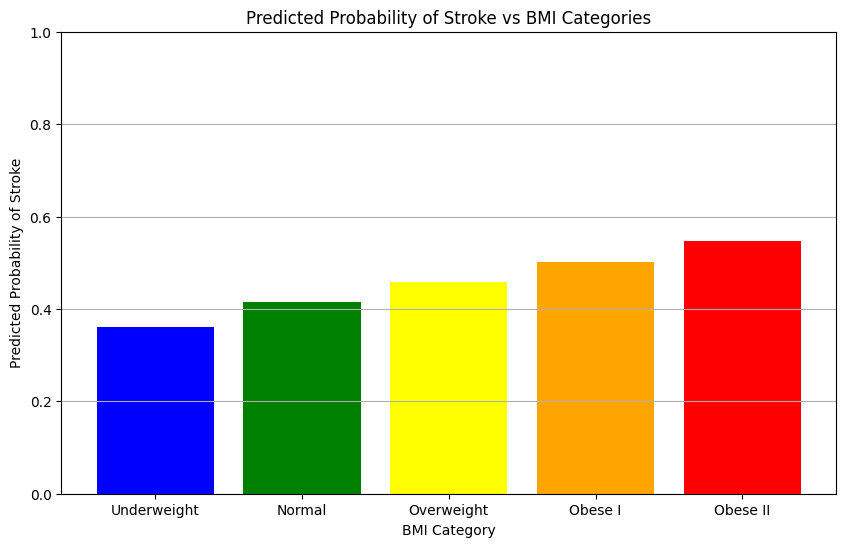


Predicted probabilities:
Underweight (BMI 18.5): 0.360
Normal (BMI 25): 0.415
Overweight (BMI 30): 0.458
Obese I (BMI 35): 0.502
Obese II (BMI 40): 0.547


In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_cleaned[['bmi']], y_train_cleaned)

# Create BMI categories
bmi_categories = np.array([18.5, 25, 30, 35, 40]).reshape(-1, 1)  # Standard BMI categories
predicted_probabilities = model.predict_proba(bmi_categories)[:, 1]

# Plot the predicted probabilities against BMI categories
plt.figure(figsize=(10, 6))
plt.bar(['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II'], 
        predicted_probabilities, 
        color=['blue', 'green', 'yellow', 'orange', 'red'])
plt.title('Predicted Probability of Stroke vs BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Predicted Probability of Stroke')
plt.ylim(0, 1)  # Adjusted y-axis limit to make differences more visible
plt.grid(axis='y')
plt.show()

# Print the actual probabilities
print("\nPredicted probabilities:")
print(f"Underweight (BMI 18.5): {predicted_probabilities[0]:.3f}")
print(f"Normal (BMI 25): {predicted_probabilities[1]:.3f}")
print(f"Overweight (BMI 30): {predicted_probabilities[2]:.3f}")
print(f"Obese I (BMI 35): {predicted_probabilities[3]:.3f}")
print(f"Obese II (BMI 40): {predicted_probabilities[4]:.3f}")

Correlation matrix showed that BMI is weakly correlated with strokes, but the logistic regression model tells a completely different story.

C:\Users\Hossam Salah\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


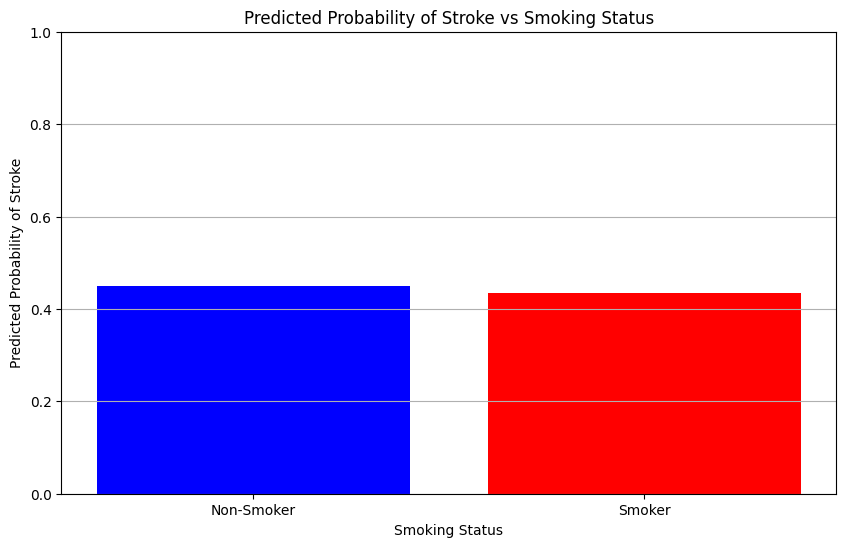


Predicted probabilities:
Non-Smoker (0): 0.449
Smoker (1): 0.434


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_cleaned[['smoking_status_smokes']], y_train_cleaned)

# Create a range of values for smoking status (0 to 1)
smoking_values = np.array([0, 1]).reshape(-1, 1)
predicted_probabilities = model.predict_proba(smoking_values)[:, 1]

# Plot the predicted probabilities against smoking status
plt.figure(figsize=(10, 6))
plt.bar(['Non-Smoker', 'Smoker'], predicted_probabilities, color=['blue', 'red'])
plt.title('Predicted Probability of Stroke vs Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Predicted Probability of Stroke')
plt.ylim(0, 1)  # Adjusted y-axis limit to make differences more visible
plt.grid(axis='y')
plt.show()

# Print the actual probabilities
print("\nPredicted probabilities:")
print(f"Non-Smoker (0): {predicted_probabilities[0]:.3f}")
print(f"Smoker (1): {predicted_probabilities[1]:.3f}")

Somehow those who actively smoke only has an increased stroke risk of just 0.5%.. Making this feature irrelevant to the classifier despite it's importance to the domain.

C:\Users\Hossam Salah\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


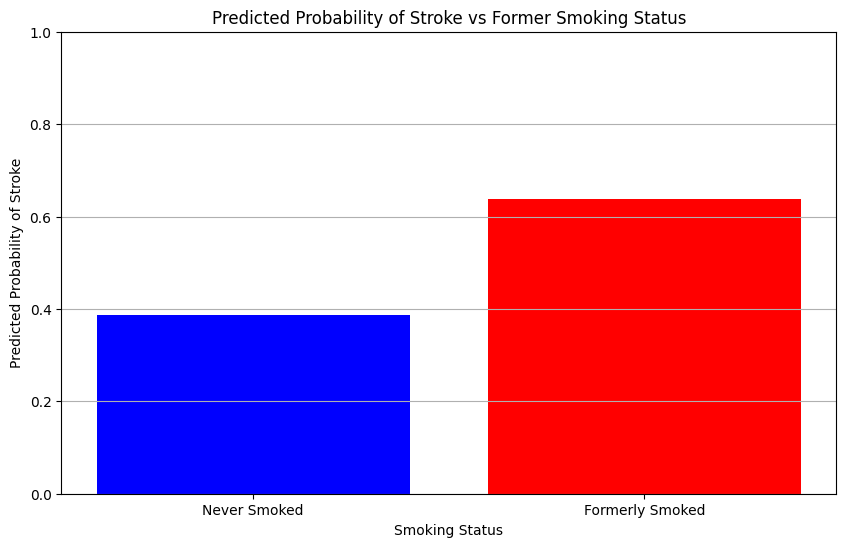


Predicted probabilities:
Never Smoked (0): 0.386
Formerly Smoked (1): 0.639


In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_cleaned[['smoking_status_formerly smoked']], y_train_cleaned)

# Create a range of values for smoking status (0 to 1)
smoking_values = np.array([0, 1]).reshape(-1, 1)
predicted_probabilities = model.predict_proba(smoking_values)[:, 1]

# Plot the predicted probabilities against smoking status
plt.figure(figsize=(10, 6))
plt.bar(['Never Smoked', 'Formerly Smoked'], predicted_probabilities, color=['blue', 'red'])
plt.title('Predicted Probability of Stroke vs Former Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Predicted Probability of Stroke')
plt.ylim(0, 1)  # Adjusted y-axis limit to make differences more visible
plt.grid(axis='y')
plt.show()

# Print the actual probabilities
print("\nPredicted probabilities:")
print(f"Never Smoked (0): {predicted_probabilities[0]:.3f}")
print(f"Formerly Smoked (1): {predicted_probabilities[1]:.3f}")

Huge difference there for people who formerly smoked (65% stroke risk) and those who didn't (38%).
Our best guess is that the data collected from those who are former smokers are people that have been smoking for a long time and then quit.
The rest may be different combinations from those who currently smoke (maybe data was collected from new smokers), those who never smoked, and others with unknown status.

C:\Users\Hossam Salah\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


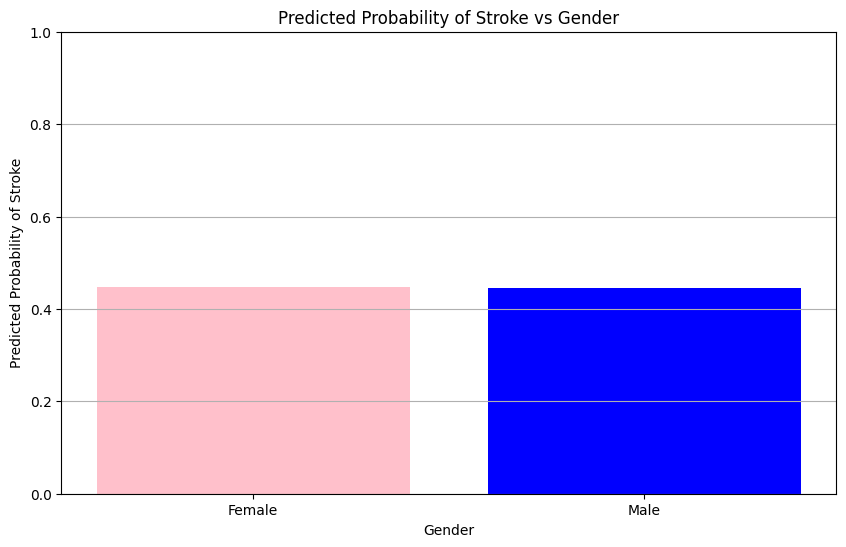


Predicted probabilities:
Female (0): 0.448
Male (1): 0.446


In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_cleaned[['gender_Male']], y_train_cleaned)

# Create a range of values for gender (0 to 1)
gender_values = np.array([0, 1]).reshape(-1, 1)
predicted_probabilities = model.predict_proba(gender_values)[:, 1]

# Plot the predicted probabilities against gender
plt.figure(figsize=(10, 6))
plt.bar(['Female', 'Male'], predicted_probabilities, color=['pink', 'blue'])
plt.title('Predicted Probability of Stroke vs Gender')
plt.xlabel('Gender')
plt.ylabel('Predicted Probability of Stroke')
plt.ylim(0, 1)  # Adjusted y-axis limit to make differences more visible
plt.grid(axis='y')
plt.show()

# Print the actual probabilities
print("\nPredicted probabilities:")
print(f"Female (0): {predicted_probabilities[0]:.3f}")
print(f"Male (1): {predicted_probabilities[1]:.3f}")

As we can see, difference in probability between stroke cases in males and females is a mere 6%. This feature does not contribute much to our prediction and can therefore be dropped.
This difference can probably be explained by the varying amount of males and females in the dataset itself.

C:\Users\Hossam Salah\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Hossam Salah\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


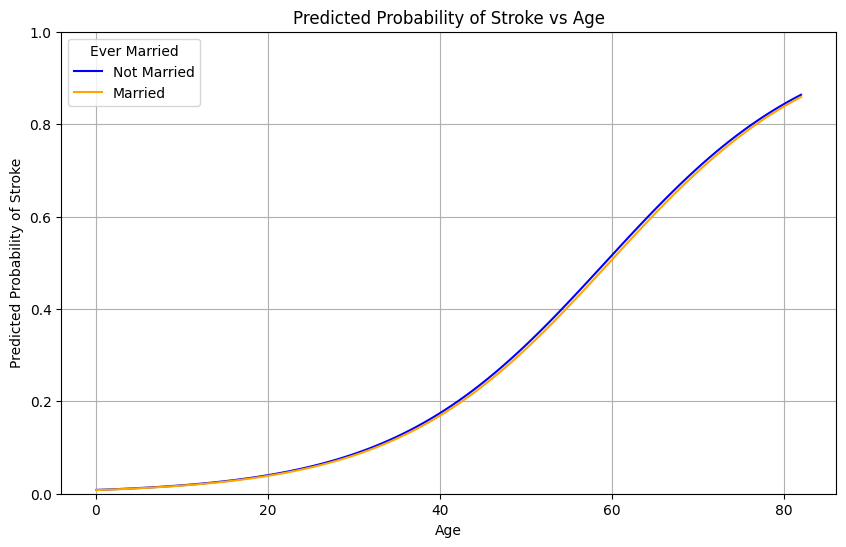

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Prepare the data
X = X_train_cleaned[['age', 'ever_married_Yes']]  # Features
y = y_train_cleaned  # Target variable

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X, y)

# Generate a range of ages for prediction
age_range = np.linspace(X_train_cleaned['age'].min(), X_train_cleaned['age'].max(), 100)

# Create a DataFrame for predictions
probabilities = []
for married_status in [0, 1]:  # 0 for No, 1 for Yes
    age_married = np.column_stack((age_range, np.full_like(age_range, married_status)))
    predicted_probs = model.predict_proba(age_married)[:, 1]  # Probability of stroke (class 1)
    probabilities.append(predicted_probs)

# Plot the predicted probabilities
plt.figure(figsize=(10, 6))
plt.plot(age_range, probabilities[0], label='Not Married', color='blue')
plt.plot(age_range, probabilities[1], label='Married', color='orange')
plt.title('Predicted Probability of Stroke vs Age')
plt.xlabel('Age')
plt.ylabel('Predicted Probability of Stroke')
plt.ylim(0, 1)  # Adjusted y-axis limit to make differences more visible
plt.legend(title='Ever Married')
plt.grid()
plt.show()

 Notice here, Ever_Married feature doesn't matter as its most likely a factor of age, older people get more strokes due to their age, older people also have a much higher probability of having ever married. Correlation does not equal causation

Same conclusion can be drawn with the work_type, data show that work_type = Self_Employed has a higher probability of strokes than work_type = never_worked or children. This is because individuals that have worked before are most likely older people. Again, the high chance of stroke occurs thanks to the age feature and not something to do with their work status.
Keeping this feature would introduce redundancy as it is already represented by the age feature.

# **Features to be dropped:**

-ever_married_Yes  
-smoking_status_never smoked
-smoking_status_smokes
-smoking_status_Unknown
-work_type_Self-employed  
-Residence_type_Urban             
-work_type_Private           
-gender_Male                    
-work_type_Govt_job              
-gender_Other                      
-gender_Female                   
-work_type_Never_worked          
-Residence_type_Rural                     
-work_type_children              
-ever_married_No

In [23]:
#Drop the above features from the dataset
x_train_filtered = X_train_cleaned.drop(columns=['ever_married_Yes', 'work_type_Self-employed', 'Residence_type_Urban', 'work_type_Private','gender_Male',
                                        'gender_Other', 'work_type_children', 'work_type_Govt_job', 'gender_Female', 'Residence_type_Rural',
                                       'work_type_Never_worked', 'smoking_status_never smoked', 'smoking_status_Unknown','ever_married_No',
                                       'smoking_status_smokes']) 
y_train_filtered = y_train_cleaned.drop(columns=['ever_married_Yes', 'work_type_Self-employed', 'Residence_type_Urban', 'work_type_Private','gender_Male',
                                        'gender_Other', 'work_type_children', 'work_type_Govt_job', 'gender_Female', 'Residence_type_Rural',
                                       'work_type_Never_worked', 'smoking_status_never smoked', 'smoking_status_Unknown','ever_married_No',
                                       'smoking_status_smokes']) 
x_val_filtered = X_val.drop(columns=['ever_married_Yes', 'work_type_Self-employed', 'Residence_type_Urban', 'work_type_Private','gender_Male',
                                        'gender_Other', 'work_type_children', 'work_type_Govt_job', 'gender_Female', 'Residence_type_Rural',
                                       'work_type_Never_worked', 'smoking_status_never smoked', 'smoking_status_Unknown','ever_married_No',
                                       'smoking_status_smokes']) 
y_val_filtered = y_val.drop(columns=['ever_married_Yes', 'work_type_Self-employed', 'Residence_type_Urban', 'work_type_Private','gender_Male',
                                        'gender_Other', 'work_type_children', 'work_type_Govt_job', 'gender_Female', 'Residence_type_Rural',
                                       'work_type_Never_worked', 'smoking_status_never smoked', 'smoking_status_Unknown','ever_married_No',
                                       'smoking_status_smokes']) 
x_test_filtered = X_test.drop(columns=['ever_married_Yes', 'work_type_Self-employed', 'Residence_type_Urban', 'work_type_Private','gender_Male',
                                        'gender_Other', 'work_type_children', 'work_type_Govt_job', 'gender_Female', 'Residence_type_Rural',
                                      'work_type_Never_worked', 'smoking_status_never smoked', 'smoking_status_Unknown','ever_married_No',
                                       'smoking_status_smokes']) 
y_test_filtered = y_test.drop(columns=['ever_married_Yes', 'work_type_Self-employed', 'Residence_type_Urban', 'work_type_Private','gender_Male',
                                        'gender_Other', 'work_type_children', 'work_type_Govt_job', 'gender_Female', 'Residence_type_Rural',
                                       'work_type_Never_worked', 'smoking_status_never smoked', 'smoking_status_Unknown','ever_married_No',
                                       'smoking_status_smokes']) 

x_train_filtered.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked
0,54.0,0.0,0.0,206.72,26.7,0.0
1,45.0,1.0,0.0,85.52,36.4,0.0
3,9.0,0.0,0.0,114.99,18.8,0.0
4,79.0,0.0,0.0,83.70,28.7,0.0
5,40.0,0.0,0.0,95.04,42.4,0.0


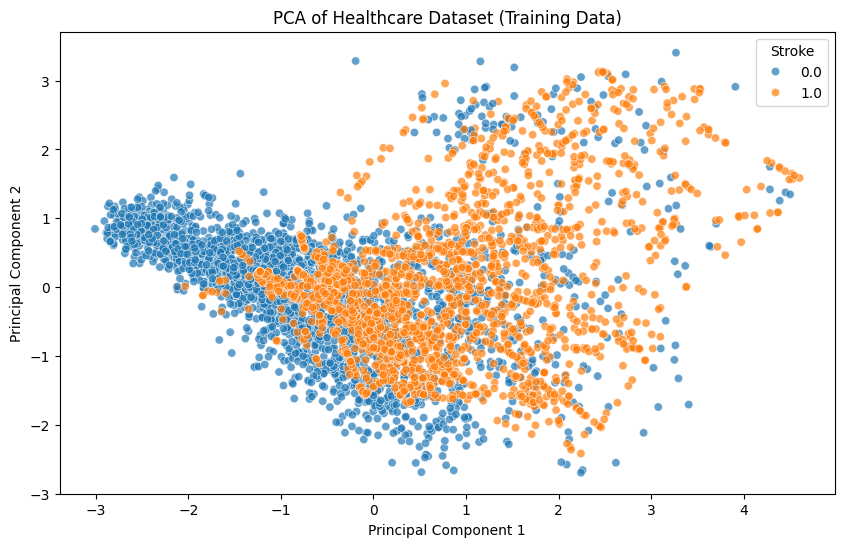


Explained variance ratio:
PC1: 0.324
PC2: 0.162

Feature contributions to principal components:
                                     PC1       PC2
age                             0.542715 -0.048888
hypertension                    0.393769 -0.036837
heart_disease                   0.395547  0.650294
avg_glucose_level               0.422131  0.261586
bmi                             0.332499 -0.431701
smoking_status_formerly smoked  0.324344 -0.564427


In [24]:
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train_filtered)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['stroke'] = y_train_filtered.values

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='stroke', data=pca_df, alpha=0.7)
plt.title('PCA of Healthcare Dataset (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Stroke', loc='upper right')
plt.show()

# Print the explained variance ratio
print("\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")

# Print the feature contributions to each principal component
feature_contributions = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=x_train_filtered.columns
)
print("\nFeature contributions to principal components:")
print(feature_contributions)




Explained variance ratio:
LDA: 1.000

Feature contributions to Linear Discriminant:
                                     LD1
age                             1.641919
hypertension                    0.220991
heart_disease                   0.155922
avg_glucose_level               0.185573
bmi                            -0.160697
smoking_status_formerly smoked  0.144371


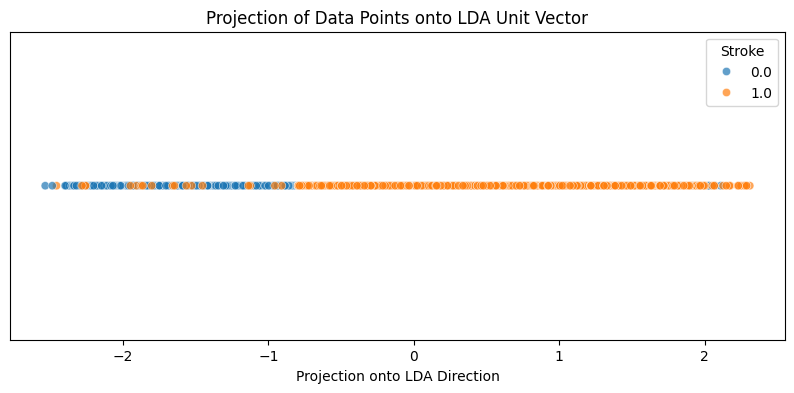


Verifying BMI relationship:
Mean BMI for stroke cases: 29.36856156644729
Mean BMI for non-stroke cases: 28.129176161829587


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train_filtered)

# 2. Fit LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y_train_filtered)

# 3. Explained variance ratio
print("\nExplained variance ratio:")
print(f"LDA: {lda.explained_variance_ratio_[0]:.3f}")

# 4. Feature contributions to LDA direction
feature_contributions = pd.DataFrame(
    lda.coef_.T,
    columns=['LD1'],
    index=x_train_filtered.columns
)
print("\nFeature contributions to Linear Discriminant:")
print(feature_contributions)

# 5. Get the LDA unit vector
lda_direction = lda.coef_[0]
lda_unit_vector = lda_direction / np.linalg.norm(lda_direction)

# 6. Project the data onto the LDA unit vector
lda_projection = np.dot(X_scaled, lda_unit_vector)

# 7. Create a DataFrame for visualization
lda_proj_df = pd.DataFrame({
    'LDA_projection': lda_projection,
    'stroke': y_train_filtered.values
})

# 8. Plot the projections
plt.figure(figsize=(10, 4))
sns.scatterplot(x='LDA_projection', y=[0]*len(lda_projection), hue='stroke', data=lda_proj_df, alpha=0.7)
plt.title('Projection of Data Points onto LDA Unit Vector')
plt.xlabel('Projection onto LDA Direction')
plt.yticks([])
plt.legend(title='Stroke')
plt.show()

# 9. (Optional) Check the mean of a feature for each class
print("\nVerifying BMI relationship:")
print("Mean BMI for stroke cases:", x_train_filtered[y_train_filtered == 1]['bmi'].mean())
print("Mean BMI for non-stroke cases:", x_train_filtered[y_train_filtered == 0]['bmi'].mean())

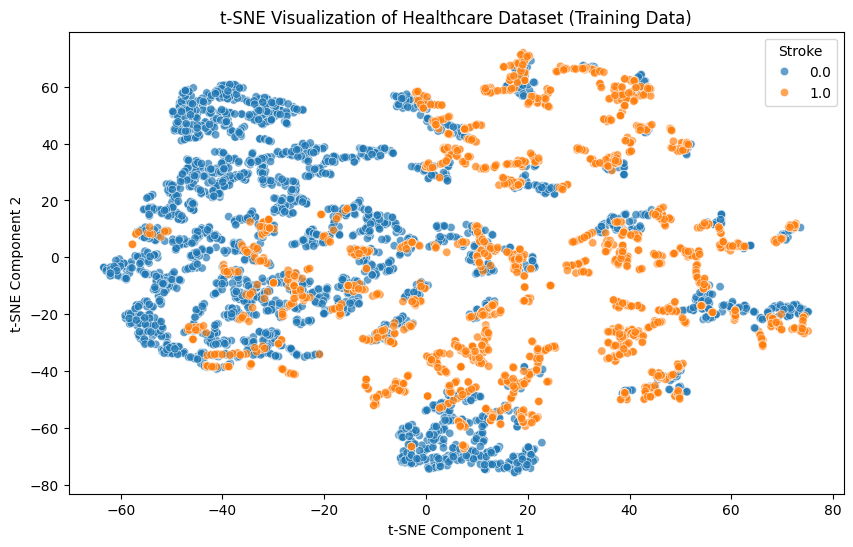

In [26]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Prepare the data
X = x_train_filtered
y = y_train_filtered

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 3. Create a DataFrame for plotting
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['stroke'] = y.values

# 4. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='stroke', data=tsne_df, alpha=0.7)
plt.title('t-SNE Visualization of Healthcare Dataset (Training Data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Stroke')
plt.show()

In [27]:
#describe bmi and avg glucose level columns
x_train_filtered[['bmi', 'avg_glucose_level']].describe(percentiles=[.25, .5, .75, .95, .99])


,bmi,avg_glucose_level
count,4996.000000,4996.000000
mean,28.683377,108.880231
std,5.939563,44.519101
min,11.500000,55.220000
25%,25.048615,78.141131
50%,28.573138,93.695000
75%,31.800000,119.028444
95%,39.900000,207.395505
99%,44.205000,220.103919
max,46.500000,224.958124


# **Naive Bayes**

Fitting 5 folds for each of 35 candidates, totalling 175 fits


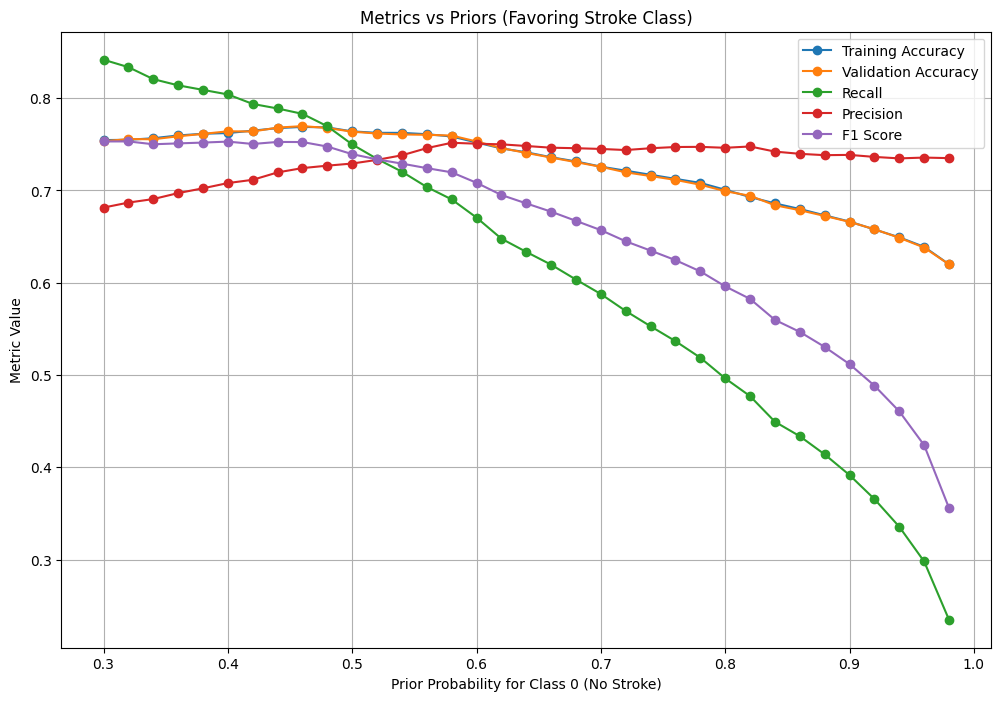

Best Parameters: {'priors': (np.float64(0.3), np.float64(0.7))}
Best Cross-Validation Recall: 0.8415365014395924

Validation Recall: 0.9166666666666666
Validation Precision: 0.1274131274131274
Validation F1 Score: 0.22372881355932203
Validation Accuracy: 0.6950732356857523


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Generate all possible prior combinations with increments of 0.02, favoring the stroke class
step = 0.02
priors_list = [(p, 1 - p) for p in np.arange(0.3, 1 + step, step) if p <= 1]  # Start with higher stroke class priors

# Define the parameter grid
param_grid = {'priors': priors_list}

# Initialize the GaussianNB model
nb_model = GaussianNB()

# Define custom scoring metrics with zero_division parameter
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, zero_division=0),  # Prioritize recall
    'precision': make_scorer(precision_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid,
    scoring=scoring,
    refit='recall',  # Use recall to select the best model
    cv=5,  # 5-fold cross-validation
    verbose=1,
    return_train_score=True
)

# Fit the grid search on the training data
grid_search.fit(x_train_filtered, y_train_filtered)

# Extract results
results = grid_search.cv_results_

# Extract metrics for plotting
prior_values = [p[0] for p in priors_list]
training_accuracies = results['mean_train_accuracy']
validation_accuracies = results['mean_test_accuracy']
recalls = results['mean_test_recall']
precisions = results['mean_test_precision']
f1_scores = results['mean_test_f1']

# Plot the metrics
plt.figure(figsize=(12, 8))

# Training and validation accuracy
plt.plot(prior_values, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(prior_values, validation_accuracies, label='Validation Accuracy', marker='o')

# Recall, precision, and F1 score
plt.plot(prior_values, recalls, label='Recall', marker='o')
plt.plot(prior_values, precisions, label='Precision', marker='o')
plt.plot(prior_values, f1_scores, label='F1 Score', marker='o')

# Add labels and legend
plt.title('Metrics vs Priors (Favoring Stroke Class)')
plt.xlabel('Prior Probability for Class 0 (No Stroke)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid()
plt.show()

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Recall:", grid_search.best_score_)

# Use the best model to make predictions
best_nb_model = grid_search.best_estimator_
y_val_pred = best_nb_model.predict(x_val_filtered)



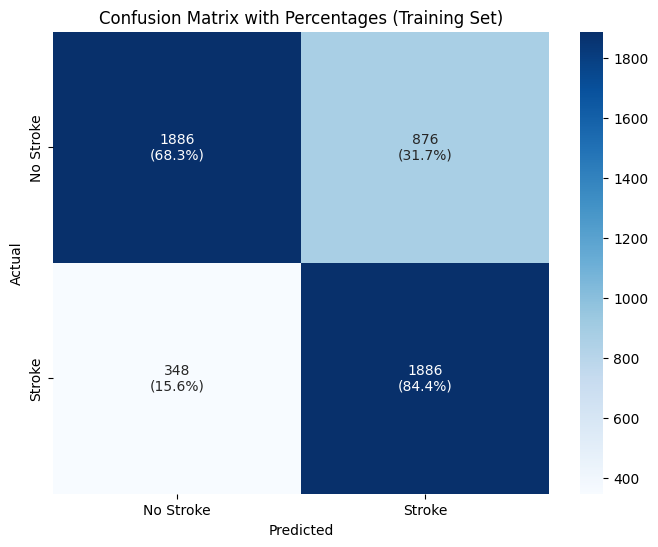

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use the best model to make predictions on the training data
y_train_pred = best_nb_model.predict(x_train_filtered)

# Generate the confusion matrix for the training set
cm_train = confusion_matrix(y_train_filtered, y_train_pred)

# Calculate percentages for the confusion matrix
cm_train_percentage = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_train,
    annot=np.array([f"{count}\n({percent:.1f}%)" for count, percent in zip(cm_train.flatten(), cm_train_percentage.flatten())]).reshape(cm_train.shape),
    fmt='',
    cmap='Blues',
    xticklabels=['No Stroke', 'Stroke'],
    yticklabels=['No Stroke', 'Stroke']
)
plt.title('Confusion Matrix with Percentages (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

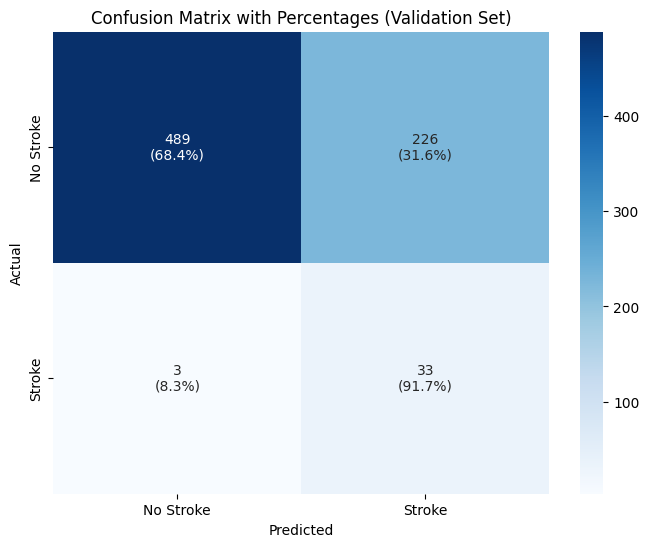

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate the confusion matrix
cm_val = confusion_matrix(y_val_filtered, y_val_pred)

# Calculate percentages for the confusion matrix
cm_val_percentage = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_val,
    annot=np.array([f"{count}\n({percent:.1f}%)" for count, percent in zip(cm_val.flatten(), cm_val_percentage.flatten())]).reshape(cm_val.shape),
    fmt='',
    cmap='Blues',
    xticklabels=['No Stroke', 'Stroke'],
    yticklabels=['No Stroke', 'Stroke']
)
plt.title('Confusion Matrix with Percentages (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

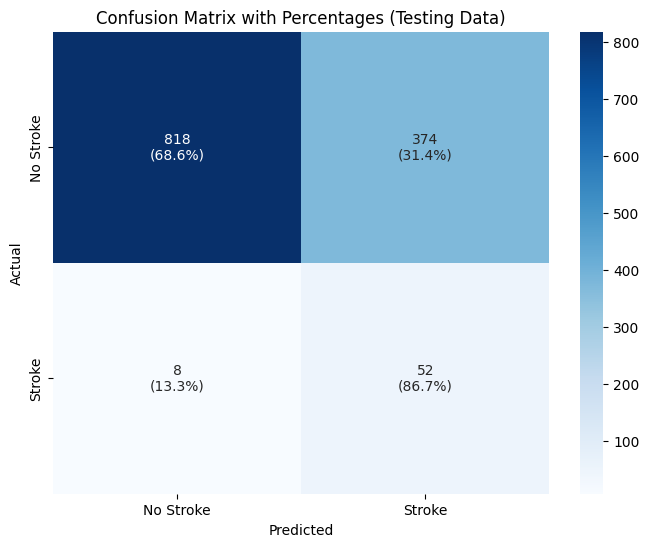


Testing Metrics:
Accuracy: 0.6949
Recall: 0.8667
Precision: 0.1221
F1 Score: 0.2140


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use the best model to make predictions on the testing data
y_test_pred = best_nb_model.predict(x_test_filtered)

# Generate the confusion matrix
cm_test = confusion_matrix(y_test_filtered, y_test_pred)

# Calculate percentages for the confusion matrix
cm_test_percentage = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_test,
    annot=np.array([f"{count}\n({percent:.1f}%)" for count, percent in zip(cm_test.flatten(), cm_test_percentage.flatten())]).reshape(cm_test.shape),
    fmt='',
    cmap='Blues',
    xticklabels=['No Stroke', 'Stroke'],
    yticklabels=['No Stroke', 'Stroke']
)
plt.title('Confusion Matrix with Percentages (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print evaluation metrics
print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_score(y_test_filtered, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test_filtered, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test_filtered, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test_filtered, y_test_pred):.4f}")

In [95]:
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
import numpy as np

# Define the objective function for Optuna
def objective(trial):
    # Suggest a prior probability for the stroke class
    prior_stroke = trial.suggest_float('prior_stroke', 0.3, 0.7)  # Range: 0.3 to 1.0
    priors = [1 - prior_stroke, prior_stroke]  # Priors for [No Stroke, Stroke]
    
    # Initialize the GaussianNB model with the suggested priors
    model = GaussianNB(priors=priors)
    
    # Perform cross-validation and calculate recall
    recall = cross_val_score(
        model, x_train_filtered, y_train_filtered, 
        cv=5, scoring=make_scorer(recall_score, zero_division=0)
    ).mean()
    
    return recall  # Optuna will maximize this value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize recall
study.optimize(objective, n_trials=35)  # Run 50 trials

# Print the best parameters and score
print("Best Parameters:", study.best_params)
print("Best Recall Score:", study.best_value)

# Train the best model with the optimal priors
best_priors = [1 - study.best_params['prior_stroke'], study.best_params['prior_stroke']]
best_nb_model = GaussianNB(priors=best_priors)
best_nb_model.fit(x_train_filtered, y_train_filtered)

# Evaluate the model on the validation set
y_train_pred = best_nb_model.predict(x_train_filtered)
print("\Training Recall:", recall_score(y_train_filtered, y_train_pred))

<>:39: SyntaxWarning: invalid escape sequence '\T'
<>:39: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Hossam Salah\AppData\Local\Temp\ipykernel_19600\801320043.py:39: SyntaxWarning: invalid escape sequence '\T'
  print("\Training Recall:", recall_score(y_train_filtered, y_train_pred))
[I 2025-05-07 21:57:10,306] A new study created in memory with name: no-name-8b93a4ff-287b-47b2-bd85-8f90c26c3e1c
[I 2025-05-07 21:57:10,367] Trial 0 finished with value: 0.8079674160572224 and parameters: {'prior_stroke': 0.6167807216561538}. Best is trial 0 with value: 0.8079674160572224.
[I 2025-05-07 21:57:10,419] Trial 1 finished with value: 0.8392993649742679 and parameters: {'prior_stroke': 0.6932356891549493}. Best is trial 1 with value: 0.8392993649742679.
[I 2025-05-07 21:57:10,468] Trial 2 finished with value: 0.7761820206458603 and parameters: {'prior_stroke': 0.5300678494140826}. Best is trial 1 with value: 0.8392993649742679.
[I 2025-05-07 21:57:10,510] Trial 3 finished with value: 

Best Parameters: {'prior_stroke': 0.6989852752257272}
Best Recall Score: 0.8415365014395924
\Training Recall: 0.8442256042972247


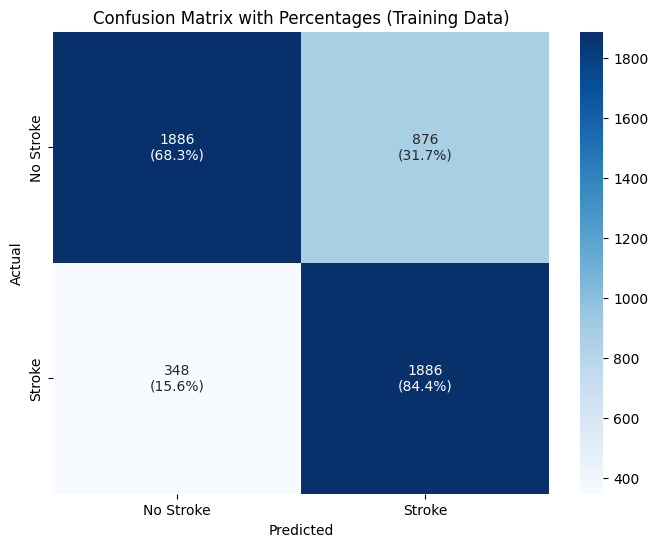


Training Metrics:
Recall: 0.8442
Precision: 0.6828
F1 Score: 0.7550


In [100]:

# Generate the confusion matrix for the training data
cm_train = confusion_matrix(y_train_filtered, y_train_pred)

# Calculate percentages for the confusion matrix
cm_train_percentage = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis] * 100

# Combine counts and percentages into a single annotation
annot = np.array([f"{count}\n({percent:.1f}%)" for count, percent in zip(cm_train.flatten(), cm_train_percentage.flatten())]).reshape(cm_train.shape)

# Plot the confusion matrix with counts and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=annot, fmt='', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix with Percentages (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print evaluation metrics
recall = recall_score(y_train_filtered, y_train_pred)
precision = precision_score(y_train_filtered, y_train_pred)
f1 = f1_score(y_train_filtered, y_train_pred)

print("\nTraining Metrics:")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

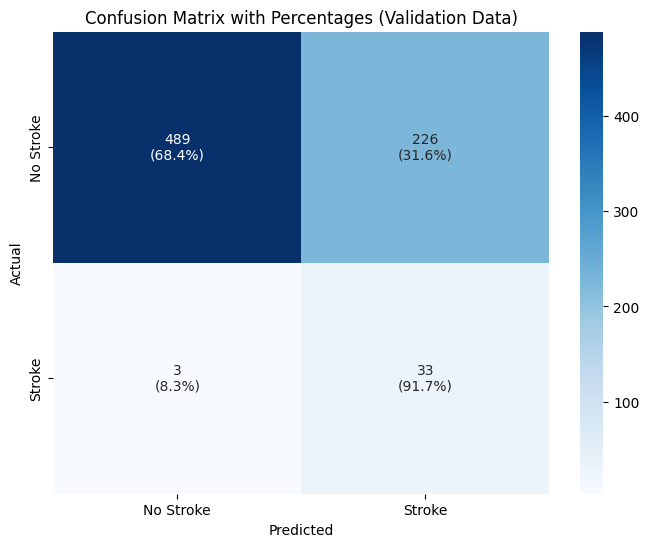


Validation Metrics:
Recall: 0.9167
Precision: 0.1274
F1 Score: 0.2237


In [98]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the validation data
y_val_pred = best_nb_model.predict(x_val_filtered)

# Generate the confusion matrix for the validation data
cm_val = confusion_matrix(y_val_filtered, y_val_pred)

# Calculate percentages for the confusion matrix
cm_val_percentage = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis] * 100

# Combine counts and percentages into a single annotation
annot = np.array([f"{count}\n({percent:.1f}%)" for count, percent in zip(cm_val.flatten(), cm_val_percentage.flatten())]).reshape(cm_val.shape)

# Plot the confusion matrix with counts and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=annot, fmt='', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix with Percentages (Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print evaluation metrics
recall = recall_score(y_val_filtered, y_val_pred)
precision = precision_score(y_val_filtered, y_val_pred)
f1 = f1_score(y_val_filtered, y_val_pred)

print("\nValidation Metrics:")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

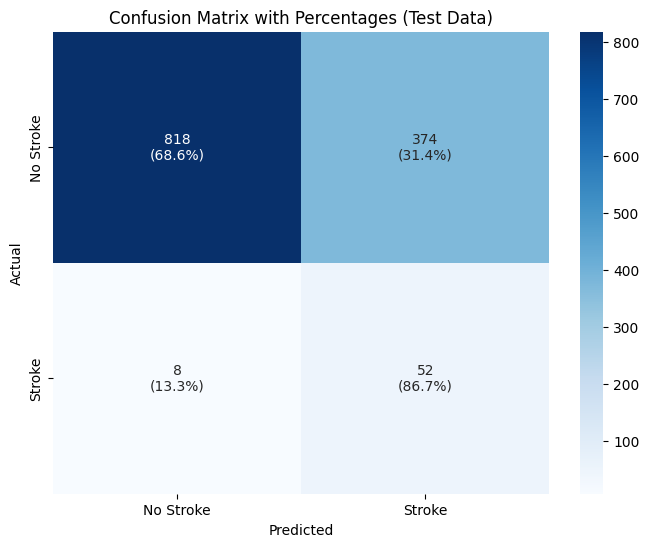


Test Metrics:
Recall: 0.8667
Precision: 0.1221
F1 Score: 0.2140


In [101]:

# Predict on the test data
y_test_pred = best_nb_model.predict(x_test_filtered)

# Generate the confusion matrix for the test data
cm_test = confusion_matrix(y_test_filtered, y_test_pred)

# Calculate percentages for the confusion matrix
cm_test_percentage = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis] * 100

# Combine counts and percentages into a single annotation
annot = np.array([f"{count}\n({percent:.1f}%)" for count, percent in zip(cm_test.flatten(), cm_test_percentage.flatten())]).reshape(cm_test.shape)

# Plot the confusion matrix with counts and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=annot, fmt='', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix with Percentages (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print evaluation metrics
recall = recall_score(y_test_filtered, y_test_pred)
precision = precision_score(y_test_filtered, y_test_pred)
f1 = f1_score(y_test_filtered, y_test_pred)

print("\nTest Metrics:")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# **SVM**


Fitting 5 folds for each of 12 candidates, totalling 60 fits


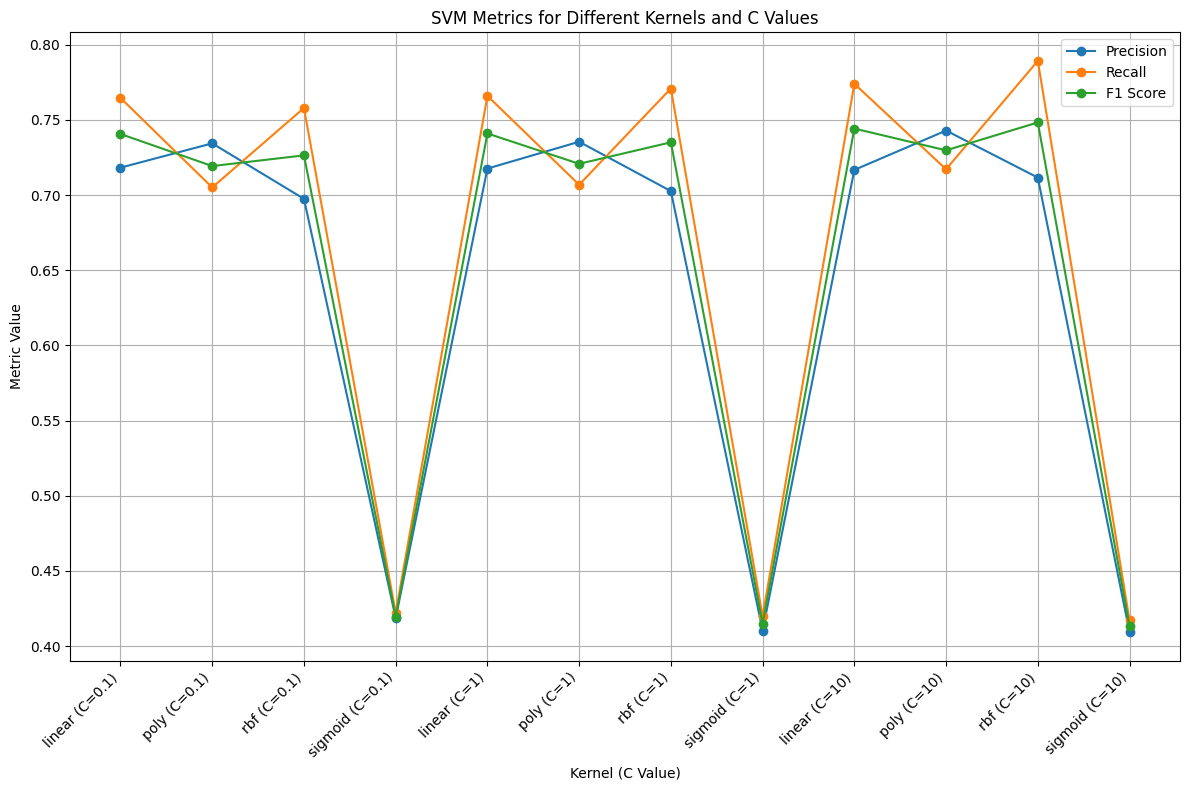

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best F1 Score: 0.7891714569476631


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid for SVM
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different kernel types
    'C': [0.1, 1, 10]  # Regularization parameter
}

# Initialize the SVM classifier
svm = SVC()

# Define custom scoring metrics
scoring = {
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring=scoring,
    refit='recall',  # Use F1-score to select the best model
    cv=5,  # 5-fold cross-validation
    verbose=1,
    return_train_score=True
)

# Fit the grid search on the training data
grid_search.fit(x_train_filtered, y_train_filtered)

# Extract results
results = grid_search.cv_results_

# Extract metrics for plotting
kernels = [str(params['kernel']) + f" (C={params['C']})" for params in results['params']]
precision_scores = results['mean_test_precision']
recall_scores = results['mean_test_recall']
f1_scores = results['mean_test_f1']

# Plot the metrics
plt.figure(figsize=(12, 8))
x = np.arange(len(kernels))

# Plot precision, recall, and F1-score
plt.plot(x, precision_scores, label='Precision', marker='o')
plt.plot(x, recall_scores, label='Recall', marker='o')
plt.plot(x, f1_scores, label='F1 Score', marker='o')

# Add labels and legend
plt.xticks(x, kernels, rotation=45, ha='right')
plt.title('SVM Metrics for Different Kernels and C Values')
plt.xlabel('Kernel (C Value)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



In [104]:
# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Recall Score: 0.7891714569476631


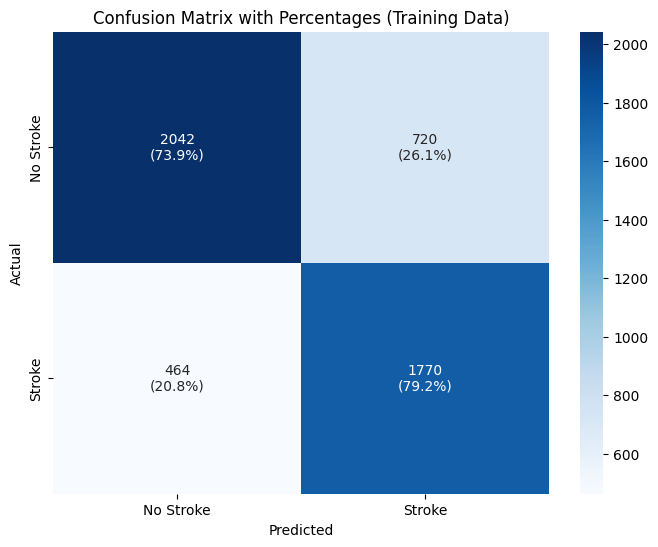


Training Metrics:
Accuracy: 0.7630
Recall: 0.7923
Precision: 0.7108
F1 Score: 0.7494


In [105]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Predict on the training data
y_train_pred = best_svm_model.predict(x_train_filtered)

# Generate the confusion matrix for the training data
cm_train = confusion_matrix(y_train_filtered, y_train_pred)

# Calculate percentages for the confusion matrix
cm_train_percentage = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis] * 100

# Combine counts and percentages into a single annotation
annot = np.array([f"{count}\n({percent:.1f}%)" for count, percent in zip(cm_train.flatten(), cm_train_percentage.flatten())]).reshape(cm_train.shape)

# Plot the confusion matrix with counts and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=annot, fmt='', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix with Percentages (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_train_filtered, y_train_pred)
recall = recall_score(y_train_filtered, y_train_pred)
precision = precision_score(y_train_filtered, y_train_pred)
f1 = f1_score(y_train_filtered, y_train_pred)

print("\nTraining Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

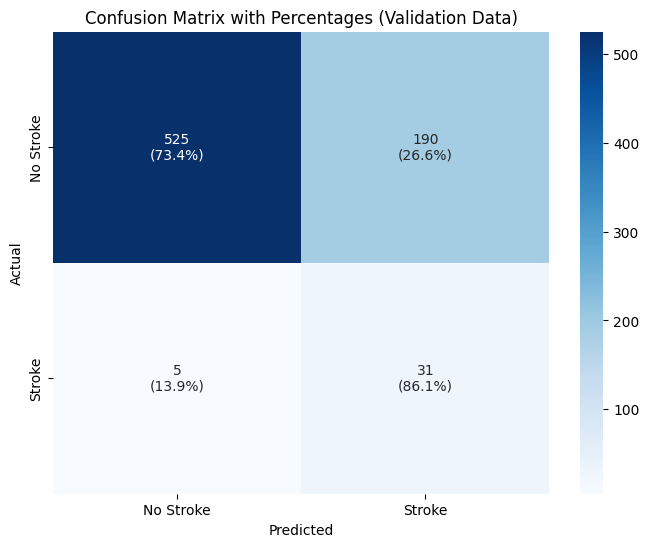


Validation Metrics:
Accuracy: 0.7403
Recall: 0.8611
Precision: 0.1403
F1 Score: 0.2412


In [106]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Predict on the validation data
y_val_pred = best_svm_model.predict(x_val_filtered)

# Generate the confusion matrix for the validation data
cm_val = confusion_matrix(y_val_filtered, y_val_pred)

# Calculate percentages for the confusion matrix
cm_val_percentage = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis] * 100

# Combine counts and percentages into a single annotation
annot = np.array([f"{count}\n({percent:.1f}%)" for count, percent in zip(cm_val.flatten(), cm_val_percentage.flatten())]).reshape(cm_val.shape)

# Plot the confusion matrix with counts and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=annot, fmt='', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix with Percentages (Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val_filtered, y_val_pred)
recall = recall_score(y_val_filtered, y_val_pred)
precision = precision_score(y_val_filtered, y_val_pred)
f1 = f1_score(y_val_filtered, y_val_pred)

print("\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

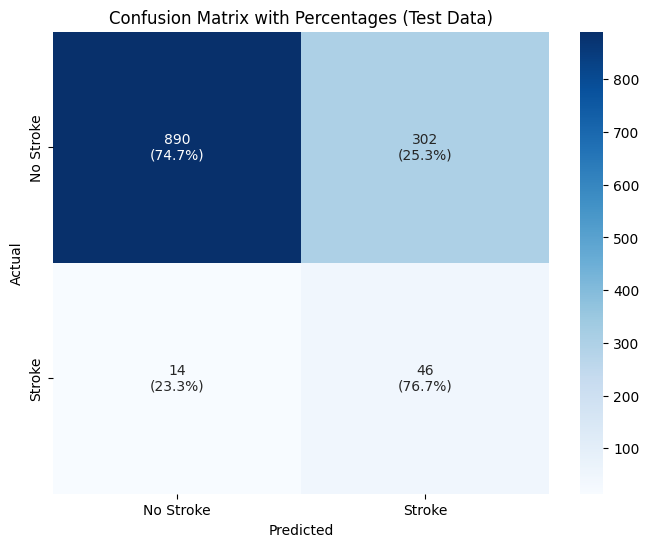


Test Metrics:
Accuracy: 0.7476
Recall: 0.7667
Precision: 0.1322
F1 Score: 0.2255


In [107]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Predict on the test data
y_test_pred = best_svm_model.predict(x_test_filtered)

# Generate the confusion matrix for the test data
cm_test = confusion_matrix(y_test_filtered, y_test_pred)

# Calculate percentages for the confusion matrix
cm_test_percentage = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis] * 100

# Combine counts and percentages into a single annotation
annot = np.array([f"{count}\n({percent:.1f}%)" for count, percent in zip(cm_test.flatten(), cm_test_percentage.flatten())]).reshape(cm_test.shape)

# Plot the confusion matrix with counts and percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=annot, fmt='', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix with Percentages (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_filtered, y_test_pred)
recall = recall_score(y_test_filtered, y_test_pred)
precision = precision_score(y_test_filtered, y_test_pred)
f1 = f1_score(y_test_filtered, y_test_pred)

print("\nTest Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define custom scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',  # Use F1-score to select the best model
    cv=5,  # 5-fold cross-validation
    verbose=1,
    return_train_score=True
)

# Fit the grid search on the training data
grid_search.fit(x_train_filtered, y_train_filtered)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best model to make predictions
best_knn_model = grid_search.best_estimator_
y_val_pred = best_knn_model.predict(x_val_filtered)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val_filtered, y_val_pred)
recall = recall_score(y_val_filtered, y_val_pred)
precision = precision_score(y_val_filtered, y_val_pred)
f1 = f1_score(y_val_filtered, y_val_pred)

print("\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")